### **Graphs databases-nodes**
- Graphs are great at representing and storing diverse and interconntected infromation in a structured manner.
- We can represent entities with nodes and arrow to represent in the relationship


### **Neo4j databases**
- 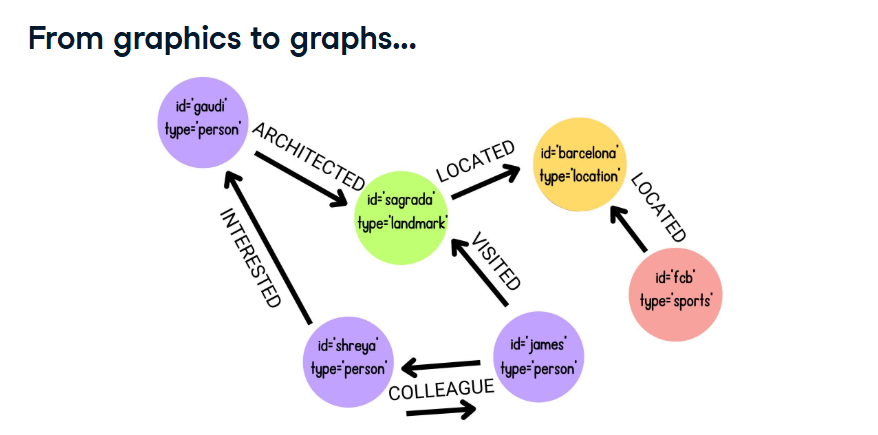

In [3]:
!pip install wikipedia

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11785 sha256=2e229cb0dbf168b68a7261c93b6eb41872832e9146f58abd3f6a1903d8afb948
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\63\47\7c\a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from langchain_community.document_loaders import WikipediaLoader
from langchain_text_splitters import TokenTextSplitter

In [5]:
raw_documents=WikipediaLoader(query='Large Language Model').load()
text_splitter=TokenTextSplitter(chunk_size=100,chunk_overlap=20)
documents=text_splitter.split_documents(raw_documents[:3])

print(documents[0])

page_content='A large language model (LLM) is a language model trained with self-supervised machine learning on a vast amount of text, designed for natural language processing tasks, especially language generation. The largest and most capable LLMs are generative pre-trained transformers (GPTs) and provide the core capabilities of modern chatbots. LLMs can be fine-tuned for specific tasks or guided by prompt engineering. These models acquire predictive power regarding syntax, semantics, and ontologies inherent in' metadata={'title': 'Large language model', 'summary': "A large language model (LLM) is a language model trained with self-supervised machine learning on a vast amount of text, designed for natural language processing tasks, especially language generation. The largest and most capable LLMs are generative pre-trained transformers (GPTs) and provide the core capabilities of modern chatbots. LLMs can be fine-tuned for specific tasks or guided by prompt engineering. These models a

**From text to graphs**

In [10]:
from dotenv import load_dotenv
def configure():
    load_dotenv()
configure()

In [11]:
from langchain_groq import ChatGroq
import os
if not os.getenv("GROQ_API_KEY"):
    raise ValueError("Missing GROQ_API_KEY in environment variables")

llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)

In [12]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer=LLMGraphTransformer(llm=llm)

In [13]:
grpah_documnets=llm_transformer.convert_to_graph_documents(documents=documents)

In [14]:
print(grpah_documnets)

[GraphDocument(nodes=[Node(id='Large Language Model', type='Language model', properties={}), Node(id='Self-Supervised Machine Learning', type='Machine learning', properties={}), Node(id='Natural Language Processing', type='Task', properties={}), Node(id='Language Generation', type='Task', properties={}), Node(id='Generative Pre-Trained Transformers', type='Model', properties={}), Node(id='Chatbots', type='Application', properties={}), Node(id='Prompt Engineering', type='Technique', properties={})], relationships=[Relationship(source=Node(id='Large Language Model', type='Language model', properties={}), target=Node(id='Self-Supervised Machine Learning', type='Machine learning', properties={}), type='TRAINED_WITH', properties={}), Relationship(source=Node(id='Large Language Model', type='Language model', properties={}), target=Node(id='Natural Language Processing', type='Task', properties={}), type='DESIGNED_FOR', properties={}), Relationship(source=Node(id='Large Language Model', type='

### **Storing and querying documnets**
#### **Instantiating the Neo4j database**

In [ ]:
from langchain_community.graphs import Neo4jGraph
graph=Neo4jGraph(url='bolt://localhost:7687',username="newp")

In [ ]:
import os
url=os.environ("NEO4J_URI")
user=os.environ("NEO4J_USERNAME")
password=os.environ("NEO4J_PASSWORD")

graph=Neo4jGraph(url=url,username=user,password=password)


In [ ]:
graph.add_graph_documents(
    graph_documents=grpah_documnets,
    include_source=True,
    baseEntityLabel=True
)
#include_source:True:link nodes to source documents with mentions edge
#baseentitylabel:ture:add__Entity__ label to each node


In [ ]:
print(graph.get_schema)


### **cypher query language**
- 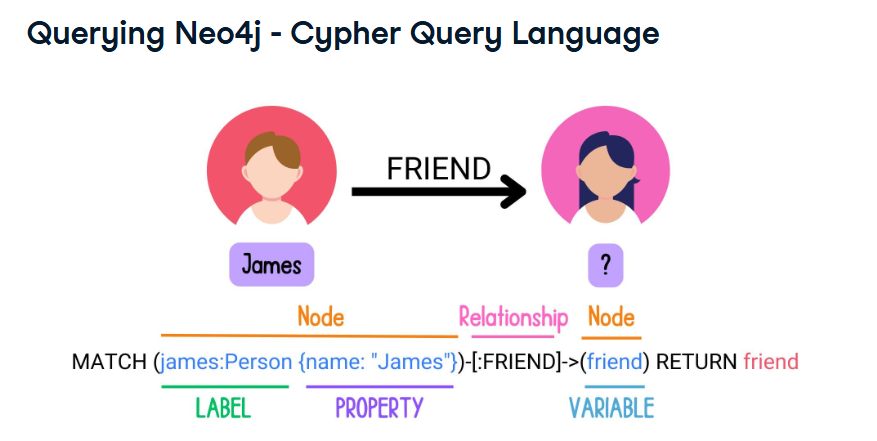

In [ ]:
results=graph.query("""
                    MATCH(gpt:Model {id:Gpt-4})-[:DEVELOPED_BY]->(org:Organization))
                    RETURN org""")

### **graph rag architecture**

In [ ]:
from langchain_community.chains.graph_qa.cypher import GraphCypherQAChain
chain=GraphCypherQAChain.from_llm(
    llm=llm,graph=graph
)

In [16]:
result=chain.invoke({"query":"What is the most accurate model?"})
print(result)

NameError: name 'chain' is not defined